In [1]:
# Исследовательский анализ данных (EDA)

In [2]:
# Датасет glass.csv,
# Он содержит различные химические характеристики образцов стекла, которые могут быть использованы для предсказания типа стекла.

In [1]:
import pandas as pd

file_name = 'glass.csv'
data = pd.read_csv(file_name)
data.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
# 1 Статистический анализ
data.describe()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


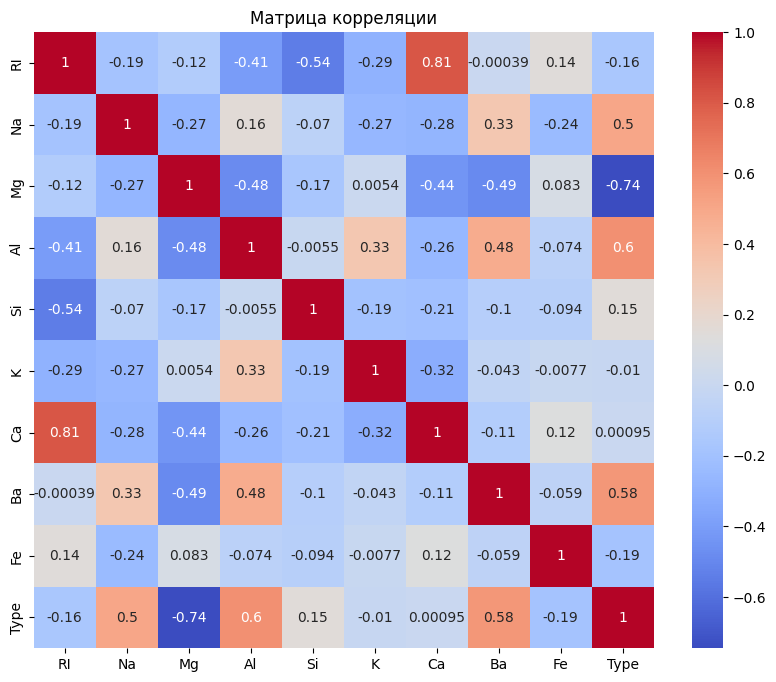

In [5]:
# 2. Визуализация данных - Построение матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()


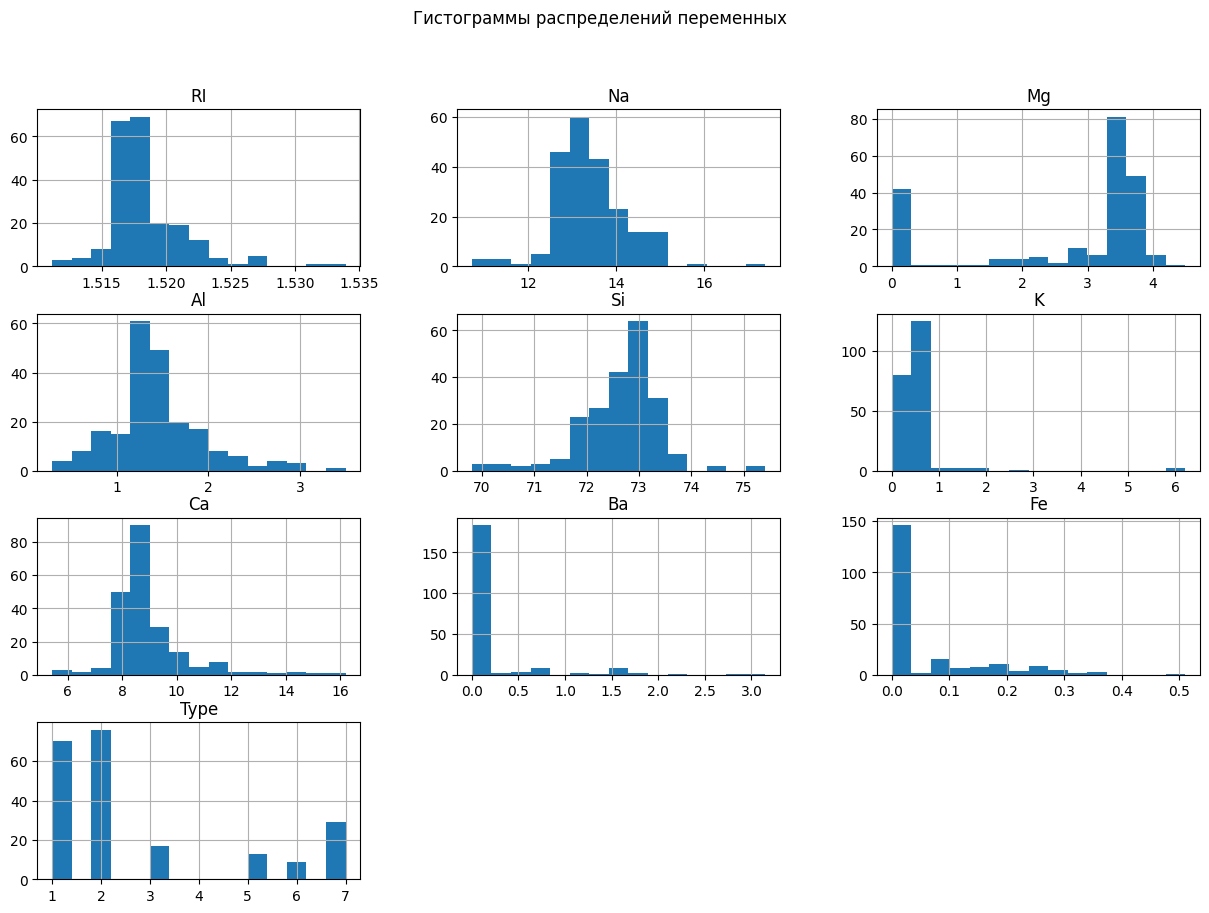

In [6]:
# 3. Анализ распределений и тенденций - Гистограммы для всех признаков
data.hist(bins=15, figsize=(15, 10))
plt.suptitle('Гистограммы распределений переменных')
plt.show()


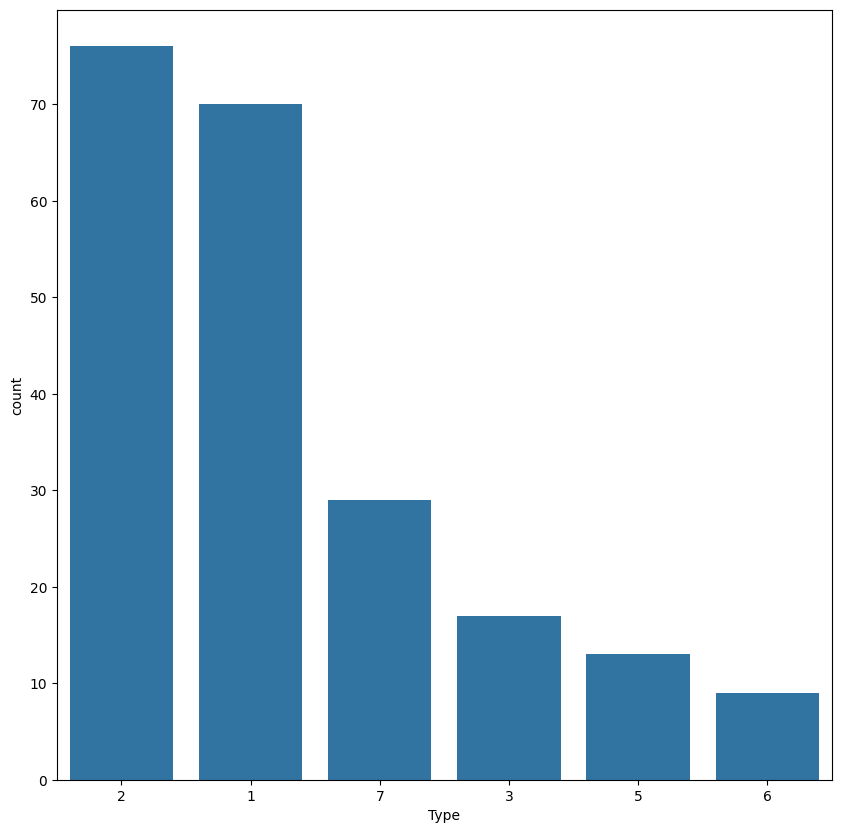

In [7]:
plt.figure(figsize=(10,10))
sns.countplot(x='Type', data=data, order=data['Type'].value_counts().index);


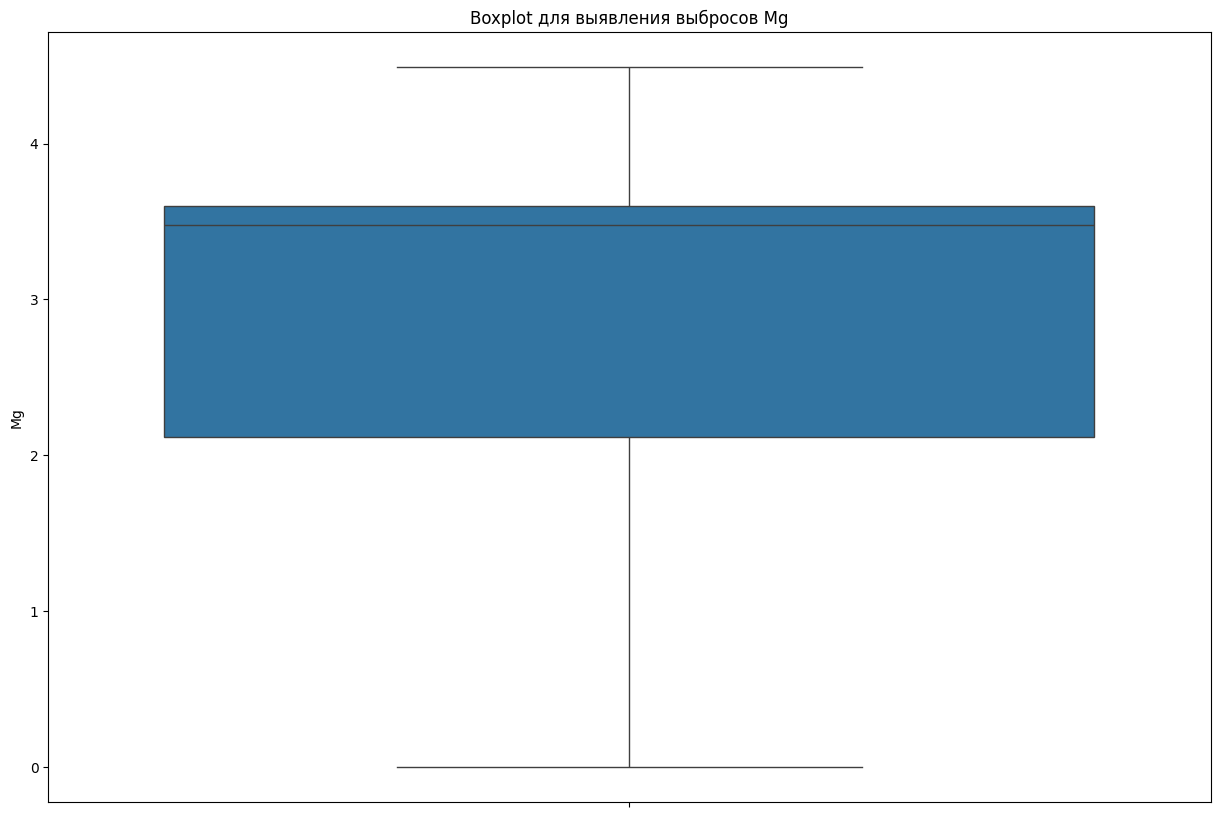

In [8]:
# 4. Выявление и обработка выбросов - Boxplot для каждого признака
plt.figure(figsize=(15, 10))
sns.boxplot(data=data['Mg'])
plt.title('Boxplot для выявления выбросов Mg')
plt.show()


In [11]:
#Центральный прямоугольник (ящик):

#Нижняя граница ящика представляет первый квартиль (25-й процентиль), что означает, что 25% наблюдений находятся ниже этой границы.
#Верхняя граница ящика представляет третий квартиль (75-й процентиль), то есть 75% наблюдений лежат ниже этой границы.
#Горизонтальная линия внутри ящика — это медиана (50-й процентиль) данных.

#Усы (whiskers):

#Усы представляют диапазон данных за пределами квартилей, но в пределах 1.5 межквартильного размаха (IQR). IQR — это разница между первым и третьим квартилями.
#Концы усов указывают на минимальное и максимальное значения в пределах этого диапазона.

#Точки за пределами усов:

#Точки, лежащие за пределами усов, считаются выбросами. Это значения, которые значительно отличаются от большинства данных в наборе.
#Выбросы могут указывать на особенности данных, ошибки измерения или вариации, которые требуют дополнительного анализа.

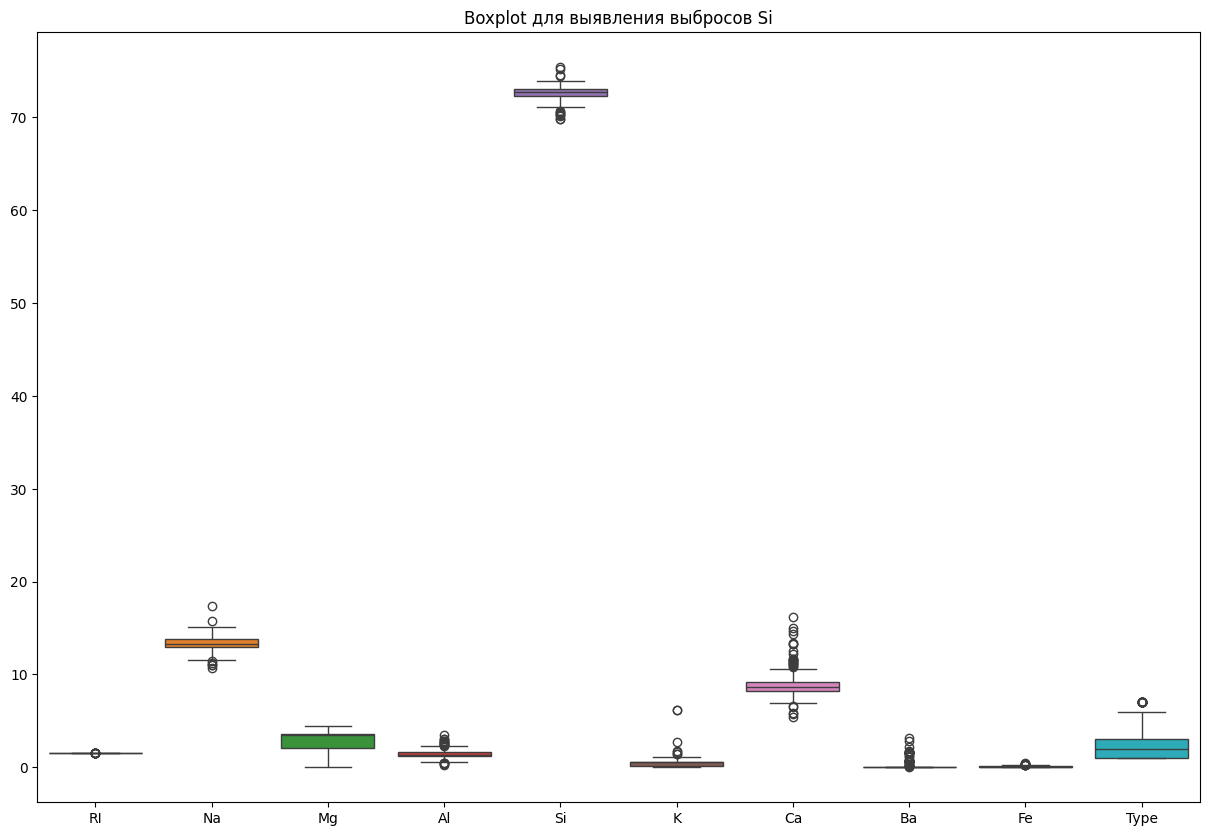

In [9]:
# 4. Выявление и обработка выбросов - Boxplot для каждого признака
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.title('Boxplot для выявления выбросов Si')
plt.show()


In [13]:
# Функция для подсчета количества выбросов для каждого признака в датасете
def count_outliers(df):
    outliers = {}
    for column in df.columns:
        if df[column].dtype != 'object':
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
            outliers[column] = outliers_count
    return outliers

# Подсчет выбросов для каждого признака в датасете glass
outliers_count = count_outliers(data)
outliers_count


{'RI': 17,
 'Na': 7,
 'Mg': 0,
 'Al': 18,
 'Si': 12,
 'K': 7,
 'Ca': 26,
 'Ba': 38,
 'Fe': 12,
 'Type': 29}

In [14]:
# В случае переменных Ba, Fe, и K в датасете glass.csv, boxplot показал наличие значительного количества точек за пределами усов,
# что указывает на наличие выбросов.
# Это может быть связано с тем, что значения этих элементов в стекле могут значительно варьироваться,
# что приводит к таким выбросам в данных.

In [15]:
# 5. Проверка предположений - Нормальность распределения с использованием теста Шапиро-Уилка
shapiro_results = {column: stats.shapiro(data[column]).pvalue for column in data.columns if data[column].dtype != 'object'}
shapiro_results


{'RI': 1.0766712928973257e-12,
 'Na': 3.4655426922932635e-07,
 'Mg': 2.390921270062536e-19,
 'Al': 2.083156241596203e-07,
 'Si': 2.175031659381684e-09,
 'K': 2.1721880356825683e-25,
 'Ca': 4.2865840413758377e-16,
 'Ba': 5.383301973907288e-26,
 'Fe': 1.1566680199469388e-20,
 'Type': 8.185170112149496e-18}

In [16]:
# Маленькие p-значения (например, меньше 0.05):
# Это означает, что нулевая гипотеза о нормальности распределения данных отвергается
# на общепринятом уровне статистической значимости (например, 0.05).
# Следовательно, данные не распределены нормально.

In [17]:
# 6. Обработка пропущенных значений
missing_values = data.isnull().sum()
missing_values


,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [18]:
# Деревья решений и ансамбевые методы.

In [19]:
!pip install xgboost lightgbm catboost

In [20]:
import pandas as pd
file_name = 'telescope.csv'
data = pd.read_csv(file_name)
data.head()


,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [21]:
data.describe()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [22]:
# g = гамма (сигнал): 12332
# h = адронный (фон): 6688


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Загрузка данных
data = pd.read_csv('telescope.csv')

# Проверка на пропущенные значения
print(data.isnull().sum())

# Определение целевой переменной и признаков
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Class'])
X = data.drop('Class', axis=1)

# Определение категориальных и числовых признаков
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Создание трансформера для предварительной обработки
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Масштабирование признаков
scaler = StandardScaler()

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Создание полного пайплайна
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', scaler)
])

# Применение трансформаций
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Определение и обучение моделей
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Тестирование моделей и вывод метрик
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")
    print(f"===================================")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


fLength     0
fWidth      0
fSize       0
fConc       0
fConcl      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
Class       0
dtype: int64
Model: Decision Tree
Accuracy: 0.83
Precision: 0.81
Recall: 0.81
F1 Score: 0.81
Confusion Matrix:
[[3203  497]
 [ 495 1511]]

Model: Random Forest
Accuracy: 0.88
Precision: 0.88
Recall: 0.86
F1 Score: 0.87
Confusion Matrix:
[[3483  217]
 [ 463 1543]]

Model: Extra Trees
Accuracy: 0.88
Precision: 0.88
Recall: 0.85
F1 Score: 0.86
Confusion Matrix:
[[3519  181]
 [ 502 1504]]

Model: Gradient Boosting
Accuracy: 0.87
Precision: 0.88
Recall: 0.84
F1 Score: 0.86
Confusion Matrix:
[[3507  193]
 [ 524 1482]]



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:03:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
Accuracy: 0.88
Precision: 0.88
Recall: 0.86
F1 Score: 0.86
Confusion Matrix:
[[3455  245]
 [ 444 1562]]

[LightGBM] [Info] Number of positive: 4682, number of negative: 8632
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 13314, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.351660 -> initscore=-0.611751
[LightGBM] [Info] Start training from score -0.611751
Model: LightGBM
Accuracy: 0.88
Precision: 0.88
Recall: 0.85
F1 Score: 0.86
Confusion Matrix:
[[3481  219]
 [ 465 1541]]

Model: CatBoost
Accuracy: 0.89
Precision: 0.89
Recall: 0.86
F1 Score: 0.87
Confusion Matrix:
[[3509  191]
 [ 443 1563]]



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoost
Accuracy: 0.84
Precision: 0.83
Recall: 0.81
F1 Score: 0.82
Confusion Matrix:
[[3357  343]
 [ 559 1447]]



In [24]:
# Регрессия Паркинсон
# subject: Идентификатор субъекта. Уникальный идентификатор для каждого участника исследования.

#age: Возраст субъекта.
# sex: Пол субъекта. Обычно 0 обозначает женщин, а 1 — мужчин.
# test_time: Время, прошедшее с начала терапевтического лечения до времени проведения теста.
# motor_UPDRS: Оценка шкалы UPDRS (Unified Parkinson's Disease Rating Scale) для двигательных функций. Шкала используется для оценки степени тяжести симптомов Паркинсона.
# total_UPDRS: Общий балл UPDRS, включающий как двигательные, так и недвигательные симптомы.
# Jitter(%), Jitter(Abs), Jitter:RAP, Jitter:PPQ5, Jitter:DDP: Эти параметры связаны с анализом голоса. "Jitter" относится к вариациям частоты голоса и может указывать на нарушения голоса, связанные с Паркинсоном.
#Shimmer, Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, Shimmer:APQ11, Shimmer:DDA: Эти показатели также относятся к анализу голоса и измеряют вариации амплитуды голоса.
#NHR (Noise-to-Harmonics Ratio): Соотношение шума к гармоникам в голосе. Высокие значения могут указывать на голосовые нарушения.
#HNR (Harmonics-to-Noise Ratio): Соотношение гармоник к шуму. Низкие значения могут быть признаком голосовых проблем.
#RPDE (Recurrence Period Density Entropy): Мера, связанная с динамикой голосового сигнала.
#DFA (Detrended Fluctuation Analysis): Статистический метод, используемый для анализа сигналов.
#PPE (Pitch Period Entropy): Мера энтропии в периодах высоты тона голоса.


In [25]:
import pandas as pd
file_name = 'parkinsons.csv'
data = pd.read_csv(file_name)
data.head()


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Загрузка данных
data = pd.read_csv('parkinsons.csv')

# Проверка на пропущенные значения
print("Пропущенные значения в каждом столбце:")
print(data.isnull().sum())

# Определение целевой переменной и признаков
X = data.drop('total_UPDRS', axis=1)
y = data['total_UPDRS']

# Определение категориальных и числовых признаков
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Создание трансформера для предварительной обработки
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
)

# Создание полного пайплайна
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler())
])

# Применение трансформаций
X_processed = pipeline.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки с стратификацией
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=42
)

# Определение и обучение моделей
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42)
}

# Инициализация списка для хранения результатов
results = []

# Тестирование моделей и сбор метрик
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'MSE': mse,
        'MAE': mae,
        'R2 Score': r2
    })

# Создание DataFrame для отображения результатов
results_df = pd.DataFrame(results)
print(results_df)

# Дополнительно: Кросс-валидация
print("\nРезультаты кросс-валидации (R2 Score):")
for name, model in models.items():
    scores = cross_val_score(model, X_processed, y, cv=5, scoring='r2')
    print(f"{name}: {scores.mean():.2f} (+/- {scores.std():.2f})")


Пропущенные значения в каждом столбце:
subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001596 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4660
[LightGBM] [Info] Number of data points in the train set: 4112, number of used features: 21
[LightGBM] [Info] Start training from score 29.004145
               Model       MSE       MAE  R2 Score
0      Random Forest  0.111101  0.158018  0.999012
1        Extra Trees  0.022910  0.074337  0.999796
2  Gradient Boosting  1.624990  0.9

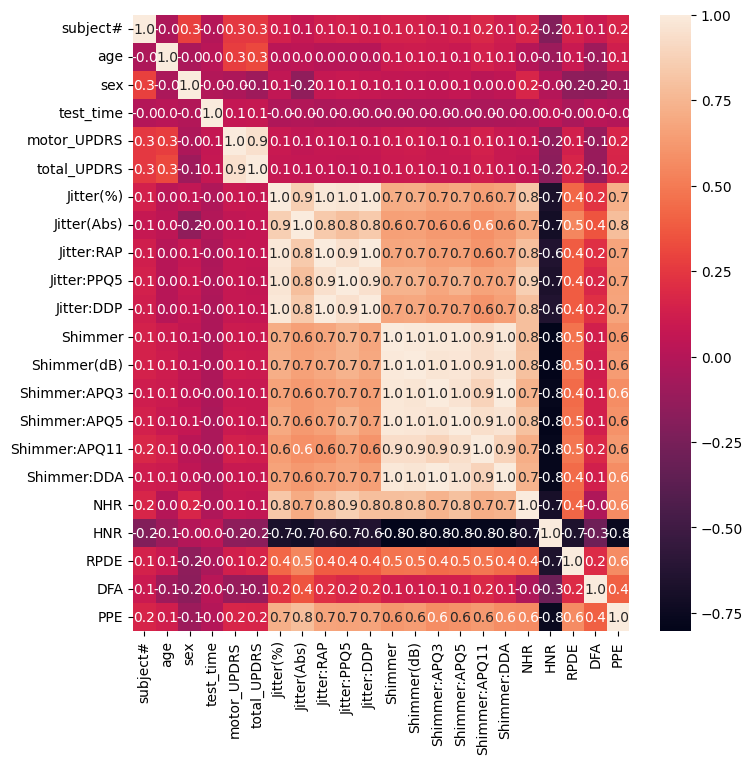

In [27]:
plt.figure(figsize = (8,8))
sns.heatmap(data.corr(),annot=True, fmt="1.1f");


In [28]:
# Методы на основе расстояний.

In [29]:
# k-ближайших соседей (kNN)

In [30]:
# Загрузка данных
data = pd.read_csv('facebook.csv')
data.head()


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [31]:
data['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [32]:
# facebook.csv, содержащим информацию о различных публикациях на Facebook и их взаимодействиях
#(реакциях, комментариях, репостах и т.д.),
# мы можем использовать метод k-ближайших соседей (k-NN) для классификации типов статусов
# (например, 'video', 'photo', 'status' и т.д.).
# Предположим, что наша задача — классифицировать тип статуса на основе числа реакций, комментариев, репостов и т.д.

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Загрузка данных
data = pd.read_csv('facebook.csv')

# Предполагая, что status_type - это целевая переменная для классификации
X = data.drop(['status_id', 'status_type', 'status_published'], axis=1) # Убираем нечисловые и несущественные признаки
y = data['status_type']

# Преобразование категорий в числовые значения
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание k-NN классификатора
knn = KNeighborsClassifier(n_neighbors=5)

# Обучение классификатора
knn.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred = knn.predict(X_test)

# Вывод результатов
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[  0   7   4   0]
 [  1 780  13  89]
 [  0  58   5   1]
 [  0 127   4 321]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.80      0.88      0.84       883
           2       0.19      0.08      0.11        64
           3       0.78      0.71      0.74       452

    accuracy                           0.78      1410
   macro avg       0.44      0.42      0.42      1410
weighted avg       0.76      0.78      0.77      1410



Пропущенные значения в каждом столбце:
status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64
Распределение классов в обучающей выборке до балансировки: Counter({1: 3431, 3: 1867, 2: 292, 0: 50})
Распределение классов в обучающей выборке после балансировки: Counter({1: 3431, 3: 3431, 2: 3431, 0: 3431})
Лучшие параметры: {'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'distance'}
Confusion Matrix:
[[  4   5   3   1]
 [ 77 552 135  93]
 [  6  25  35   7]
 [ 15  68  32 352]]

Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.31      0.07        13
           1       0.85      0.64      0.73       857
           2       0.17      0.48      0.25        73
           3       0.78      0.75      0

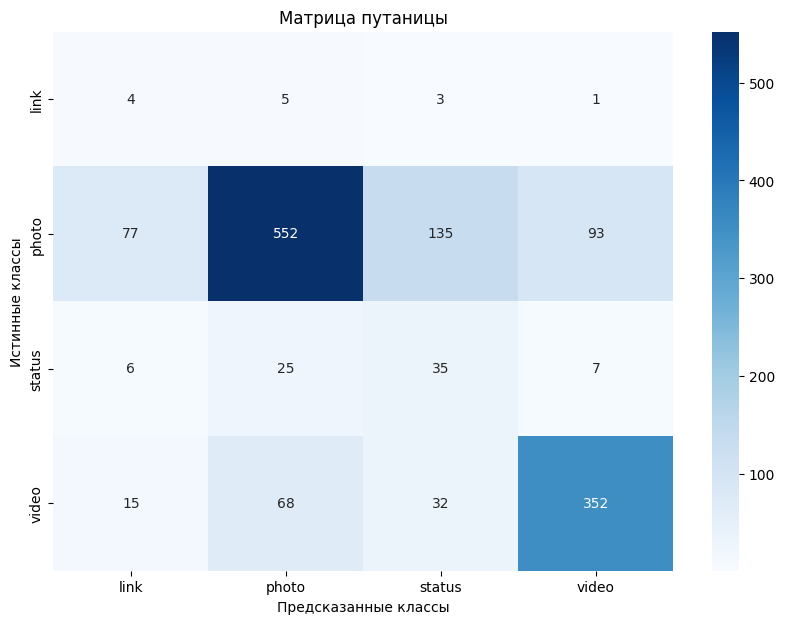


Кросс-валидация (5-fold):
Средний F1-макро: 0.37 (+/- 0.05)


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('facebook.csv')

# Проверка на пропущенные значения
print("Пропущенные значения в каждом столбце:")
print(data.isnull().sum())

# Определение целевой переменной и признаков
X = data.drop(['status_id', 'status_type', 'status_published'], axis=1)  # Убираем нечисловые и несущественные признаки
y = data['status_type']

# Преобразование категорий в числовые значения
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Определение категориальных и числовых признаков
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Создание трансформера для предварительной обработки
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
)

# Создание полного пайплайна
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Разделение данных на обучающую и тестовую выборки с стратификацией
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Балансировка классов (если необходимо)
# Проверим баланс классов
from collections import Counter
print("Распределение классов в обучающей выборке до балансировки:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Распределение классов в обучающей выборке после балансировки:", Counter(y_train_resampled))

# Определение параметров для поиска
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# Создание GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Обучение GridSearchCV на сбалансированных данных
grid_search.fit(X_train_resampled, y_train_resampled)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)

# Предсказания на тестовых данных с лучшей моделью
y_pred = grid_search.predict(X_test)

# Вывод результатов
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Визуализация матрицы путаницы
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица путаницы')
plt.show()

# Дополнительная кросс-валидация
print("\nКросс-валидация (5-fold):")
cv_scores = cross_val_score(grid_search.best_estimator_, X, y_encoded, cv=5, scoring='f1_macro')
print(f"Средний F1-макро: {cv_scores.mean():.2f} (+/- {cv_scores.std():.2f})")


In [35]:
#Структура: Каждая строка матрицы представляет фактический класс, а каждый столбец — предсказанный класс.
# Например, первая строка относится к классу 0, вторая — к классу 1, и так далее.
# Результаты:
# Класс 0: Все 11 экземпляров были неправильно классифицированы.
# Класс 1: 780 правильно классифицированных, но 103 неверных предсказаний.
# Класс 2: Только 5 правильно классифицированных из 64.
# Класс 3: 321 правильно классифицированный, но 131 неверное предсказание.

In [36]:
# Анализ результатов:
# Модель хорошо справляется с классификацией класса 1 и 3, но имеет значительные трудности с классами 0 и 2.
# Низкая точность и полнота для классов 0 и 2 могут указывать на недостаточное количество тренировочных данных для этих классов или на недостатки в обучающих данных.
# Высокая общая точность обусловлена в основном хорошей классификацией наиболее представленных классов 1 и 3.

In [37]:
# Рекомендации для улучшения:
# Перебалансировка данных: Исследуйте методы балансировки классов, например, oversampling для менее представленных классов.
# Подбор параметров: Попробуйте настроить параметры модели k-NN, такие как количество соседей (k).
# Использование других моделей: Рассмотрите возможность использования других алгоритмов классификации, которые могут лучше справляться с несбалансированными данными.

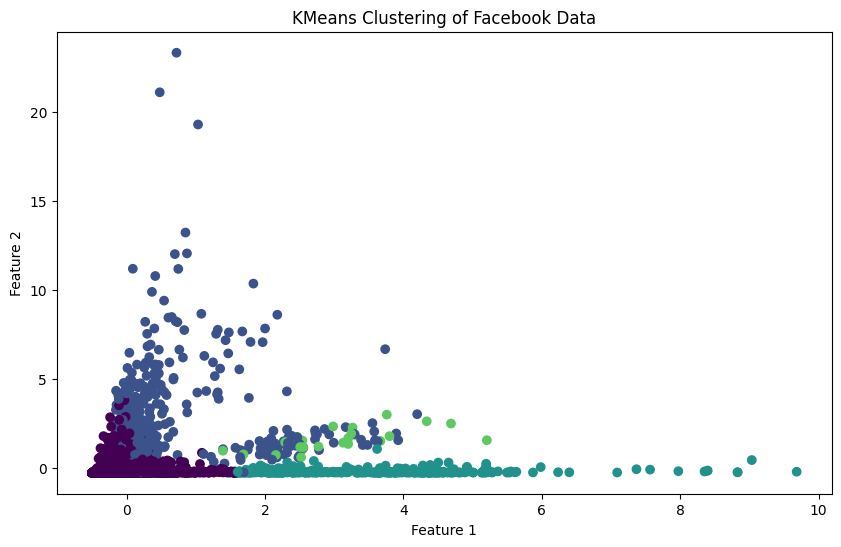

In [38]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Загрузка данных (замените 'facebook.csv' на путь к вашему файлу)
data = pd.read_csv('facebook.csv')

# Убираем категориальные и идентификаторы, оставляем только числовые признаки
X = data.select_dtypes(include=[np.number])

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение алгоритма KMeans для кластеризации
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Получение меток кластеров
labels = kmeans.labels_

# Визуализация результатов кластеризации
# (используем первые два признака для упрощения визуализации)
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('KMeans Clustering of Facebook Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [39]:
# ДЗ самостоятельно расмотреть Иерархическая кластеризация и DBSCAN,
# взять датасет из открытого источника для решения задачи класстеризации


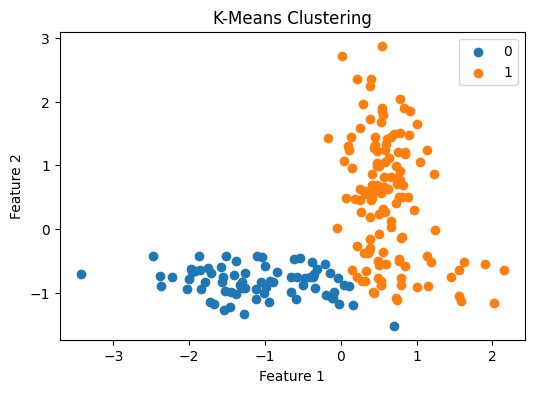

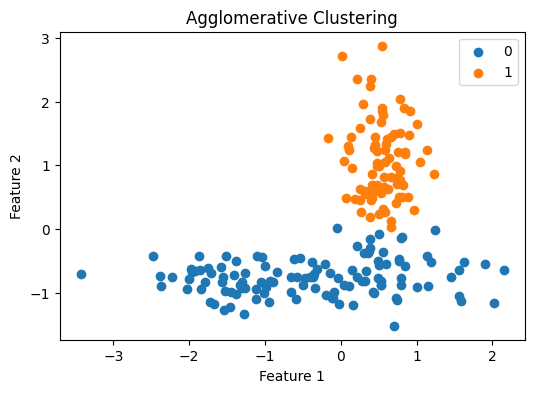

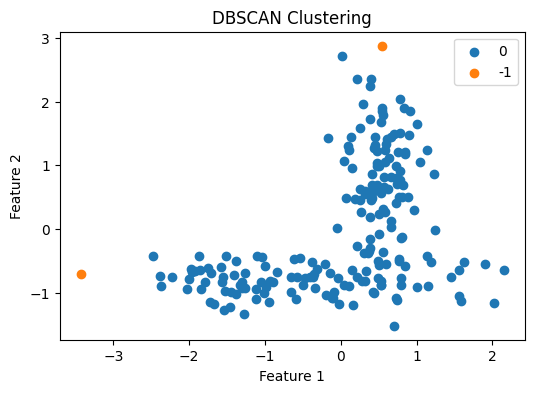

Silhouette Score for K-Means: 0.49
Silhouette Score for Agglomerative: 0.48
Silhouette Score for DBSCAN: 0.47


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Генерация искусственных данных
np.random.seed(0)
data1 = np.random.randn(100, 2) * [2, 0.5] + [0, -2]
data2 = np.random.randn(100, 2) * [0.5, 2] + [2, 2]
data = np.vstack([data1, data2])

# Функция для визуализации кластеров
def plot_clusters(data, labels, title):
    plt.figure(figsize=(6, 4))
    unique_labels = set(labels)
    for label in unique_labels:
        plt.scatter(data[labels == label, 0], data[labels == label, 1], label=label)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Нормализация данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Кластеризация K-средних
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
plot_clusters(data_scaled, kmeans_labels, 'K-Means Clustering')

# Иерархическая кластеризация
agglomerative = AgglomerativeClustering(n_clusters=2)
agg_labels = agglomerative.fit_predict(data_scaled)
plot_clusters(data_scaled, agg_labels, 'Agglomerative Clustering')

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)
plot_clusters(data_scaled, dbscan_labels, 'DBSCAN Clustering')

# Оценка силуэта для определения оптимального количества кластеров
silhouette_kmeans = silhouette_score(data_scaled, kmeans_labels)
silhouette_agg = silhouette_score(data_scaled, agg_labels)
silhouette_dbscan = silhouette_score(data_scaled, dbscan_labels)

print(f"Silhouette Score for K-Means: {silhouette_kmeans:.2f}")
print(f"Silhouette Score for Agglomerative: {silhouette_agg:.2f}")
print(f"Silhouette Score for DBSCAN: {silhouette_dbscan:.2f}")

In [41]:
# Методы понижения размерности

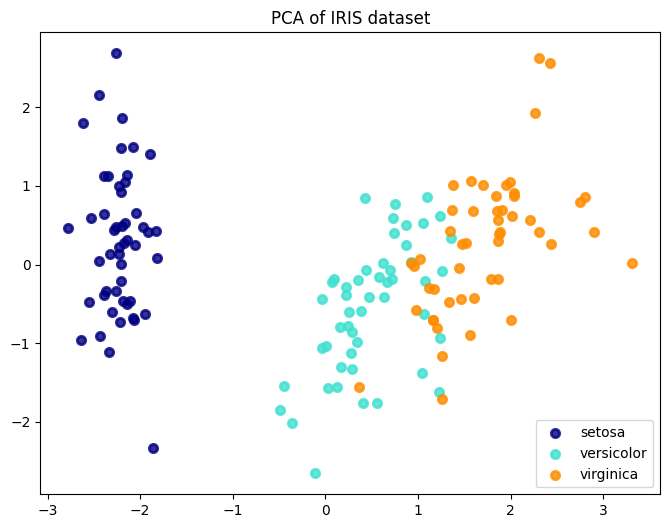

In [42]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Загрузка и подготовка датасета "Ирисы"
iris = load_iris()
X = iris.data
y = iris.target

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Использование PCA для понижения размерности до 2 компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Визуализация результатов PCA
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()


In [43]:
# Методы понижения размерности t-SNE

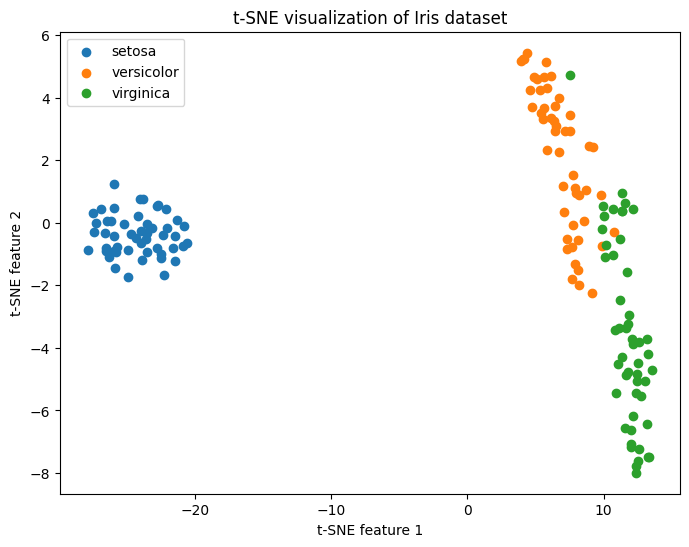

In [44]:
# Импорт необходимых библиотек
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE

# Загрузка датасета "Ирисы"
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Создание и обучение модели t-SNE
# Мы уменьшаем размерность данных до 2D для удобства визуализации
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Визуализация результатов
plt.figure(figsize=(8, 6))
for i, label in enumerate(iris.target_names):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=label)

plt.legend()
plt.title('t-SNE visualization of Iris dataset')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

In [45]:
# Методы UMAP и LDA вынесены на самостоятельное изучение

In [46]:
# Ассоциативные правила.

In [47]:

# Убедитесь, что у вас установлены библиотеки mlxtend и pandas
# Установите их, если нужно, с помощью команды: pip install mlxtend pandas

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth

# Пример набора данных
transactions = [
    ['Milk', 'Bread', 'Apples'],
    ['Milk', 'Bananas'],
    ['Bread', 'Eggs', 'Milk'],
    ['Bread', 'Eggs', 'Cornflakes'],
    ['Bread', 'Milk', 'Bananas']
]

# Преобразование данных для работы с mlxtend
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apriori Algorithm
apriori_frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

# FP-Growth Algorithm
fpgrowth_frequent_itemsets = fpgrowth(df, min_support=0.5, use_colnames=True)

# Вывод результатов
print("Apriori Frequent Itemsets:")
print(apriori_frequent_itemsets)

print("\nFP-Growth Frequent Itemsets:")
print(fpgrowth_frequent_itemsets)

Apriori Frequent Itemsets:
   support       itemsets
0      0.8        (Bread)
1      0.8         (Milk)
2      0.6  (Milk, Bread)

FP-Growth Frequent Itemsets:
   support       itemsets
0      0.8         (Milk)
1      0.8        (Bread)
2      0.6  (Milk, Bread)


In [48]:
#Столбец 'support':

#Это значение поддержки для каждого набора. Поддержка измеряется как доля транзакций, в которых встречается данный набор элементов.
#Например, значение поддержки 0.8 для 'Bread' означает, что хлеб появляется в 80% всех транзакций.

#Столбец 'itemsets':

# Показывает наборы элементов, которые встречаются вместе в достаточно большом количестве транзакций
# (согласно установленному порогу поддержки).
# Например, набор (Milk, Bread) с поддержкой 0.6 означает, что молоко и хлеб встречаются вместе в 60% всех транзакций.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
#Анализ результатов:
#'Bread' и 'Milk' как отдельные элементы: Оба продукта являются очень популярными и встречаются в 80% транзакций.
#Комбинация 'Milk' и 'Bread': Эта комбинация встречается вместе в 60% транзакций, что делает ее значимой парой товаров для рассмотрения, например, при планировании маркетинговых акций или управлении запасами в магазине.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
# Вариационные автоэнкодеры

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
!pip install torchvision

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
pip install torchvision

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Используется устройство: cuda
Эпоха 1 [0/30596 (0%)]	Потеря: 549.2024
Эпоха 1 [12800/30596 (42%)]	Потеря: 174.9337
Эпоха 1 [25600/30596 (83%)]	Потеря: 148.4439
====> Эпоха 1 Средняя потеря: 184.6692
====> Тестовая потеря: 159.3100
Эпоха 2 [0/30596 (0%)]	Потеря: 142.7055
Эпоха 2 [12800/30596 (42%)]	Потеря: 133.6491
Эпоха 2 [25600/30596 (83%)]	Потеря: 123.6299
====> Эпоха 2 Средняя потеря: 130.1816
====> Тестовая потеря: 141.0483
Эпоха 3 [0/30596 (0%)]	Потеря: 126.0837
Эпоха 3 [12800/30596 (42%)]	Потеря: 117.8022
Эпоха 3 [25600/30596 (83%)]	Потеря: 114.9971
====> Эпоха 3 Средняя потеря: 118.0094
====> Тестовая потеря: 131.6825
Эпоха 4 [0/30596 (0%)]	Потеря: 109.6585
Эпоха 4 [12800/30596 (42%)]	Потеря: 109.2543
Эпоха 4 [25600/30596 (83%)]	Потеря: 108.7476
====> Эпоха 4 Средняя потеря: 112.3675
====> Тестовая потеря: 126.3574
Эпоха 5 [0/30596 (0%)]	Потеря: 116.2496
Эпоха 5 [12800/30596 (42%)]	Потеря: 109.7898
Эпоха 5 [25600/30596 (83%)]	Потеря: 111.4641
====> Эпоха 5 Средняя потеря: 109.35

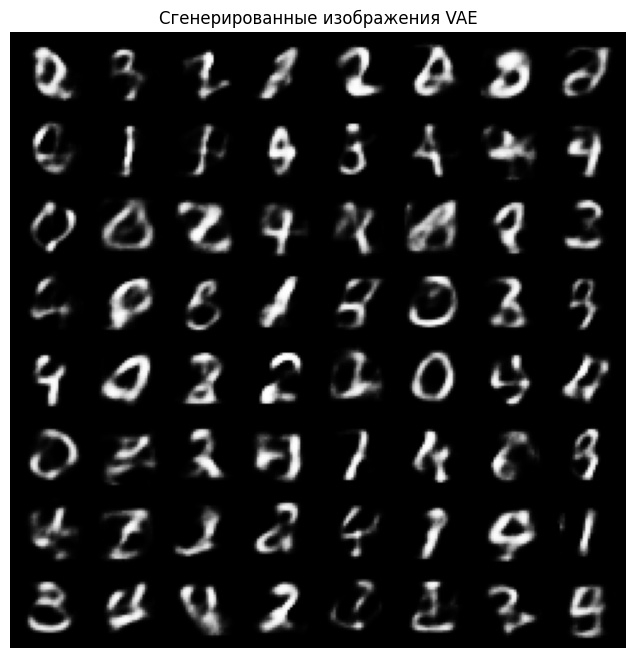

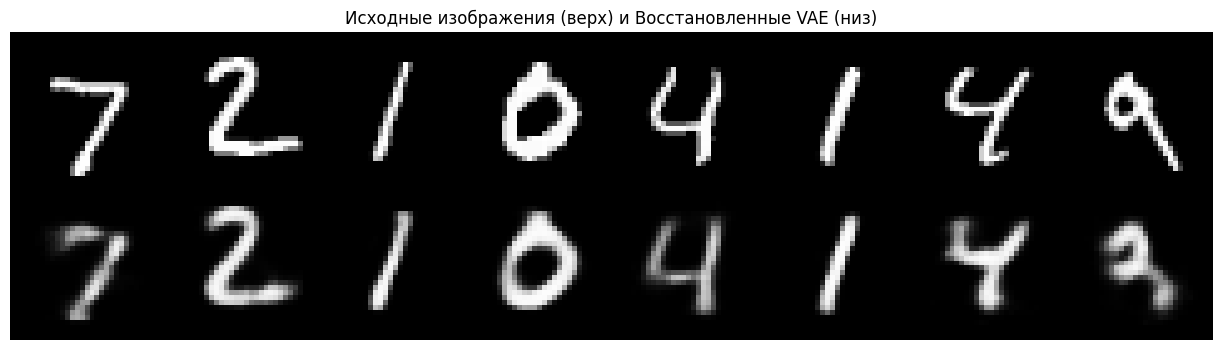

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Определение устройства (GPU если доступно, иначе CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Используется устройство: {device}")

# Параметры модели
batch_size = 128
latent_dim = 20  # Размер латентного пространства
epochs = 10
learning_rate = 1e-3

# Функция для фильтрации данных
def filter_digits(dataset, digits):
    indices = np.isin(dataset.targets, digits)
    return Subset(dataset, np.where(indices)[0])

# Загрузка набора данных MNIST
transform = transforms.ToTensor()

# Обучающая выборка: цифры 0-4
train_dataset_full = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_dataset = filter_digits(train_dataset_full, digits=[0,1,2,3,4])

# Тестовая выборка: все цифры
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Определение архитектуры VAE
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        # Энкодер
        self.fc1 = nn.Linear(28*28, 400)
        self.fc_mu = nn.Linear(400, latent_dim)      # Среднее
        self.fc_logvar = nn.Linear(400, latent_dim)  # Логарифм дисперсии

        # Декодер
        self.fc3 = nn.Linear(latent_dim, 400)
        self.fc4 = nn.Linear(400, 28*28)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        mu = self.fc_mu(h1)
        logvar = self.fc_logvar(h1)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)  # Стандартное отклонение
        eps = torch.randn_like(std)  # Случайная нормальная шумовая переменная
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 28*28))
        z = self.reparameterize(mu, logvar)
        recon_x = self.decode(z)
        return recon_x, mu, logvar

# Функция потерь для VAE
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 28*28), reduction='sum')

    # Kullback-Leibler дивергенция
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD

# Инициализация модели и оптимизатора
model = VAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Функция обучения
def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f"Эпоха {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} "
                  f"({100. * batch_idx / len(train_loader):.0f}%)]\tПотеря: {loss.item() / len(data):.4f}")

    print(f"====> Эпоха {epoch} Средняя потеря: {train_loss / len(train_loader.dataset):.4f}")

# Функция тестирования
def test(epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.to(device)
            recon, mu, logvar = model(data)
            test_loss += loss_function(recon, data, mu, logvar).item()

    test_loss /= len(test_loader.dataset)
    print(f"====> Тестовая потеря: {test_loss:.4f}")

# Обучение модели
for epoch in range(1, epochs + 1):
    train(epoch)
    test(epoch)

# Генерация новых изображений
with torch.no_grad():
    z = torch.randn(64, latent_dim).to(device)
    sample = model.decode(z).cpu()

    # Визуализация сгенерированных изображений
    grid_img = torchvision.utils.make_grid(sample.view(64, 1, 28, 28), nrow=8)
    plt.figure(figsize=(8,8))
    plt.imshow(grid_img.permute(1, 2, 0).squeeze(), cmap='gray')
    plt.title("Сгенерированные изображения VAE")
    plt.axis('off')
    plt.show()

# Восстановление изображений из тестового набора
def visualize_reconstructions():
    model.eval()
    with torch.no_grad():
        data, _ = next(iter(test_loader))
        data = data.to(device)
        recon, _, _ = model(data)

        # Выбираем первые 8 изображений
        n = 8
        comparison = torch.cat([data[:n],
                                recon.view(batch_size, 1, 28, 28)[:n]])
        grid_img = torchvision.utils.make_grid(comparison, nrow=n)

        plt.figure(figsize=(16,4))
        plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy(), cmap='gray')
        plt.title("Исходные изображения (верх) и Восстановленные VAE (низ)")
        plt.axis('off')
        plt.show()

visualize_reconstructions()


In [54]:
# Аномалии для датасета

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Используется устройство: cuda
Эпоха 1 [0/30596 (0%)]	Потеря: 552.1266
Эпоха 1 [12800/30596 (42%)]	Потеря: 173.8933
Эпоха 1 [25600/30596 (83%)]	Потеря: 143.9845
====> Эпоха 1 Средняя потеря: 183.4437 Время: 7.41 секунд
====> Тестовая потеря: 158.3291 Время: 2.96 секунд
Эпоха 2 [0/30596 (0%)]	Потеря: 134.4449
Эпоха 2 [12800/30596 (42%)]	Потеря: 130.8292
Эпоха 2 [25600/30596 (83%)]	Потеря: 124.1452
====> Эпоха 2 Средняя потеря: 129.4526 Время: 11.64 секунд
====> Тестовая потеря: 139.1772 Время: 2.58 секунд
Эпоха 3 [0/30596 (0%)]	Потеря: 121.6723
Эпоха 3 [12800/30596 (42%)]	Потеря: 116.2937
Эпоха 3 [25600/30596 (83%)]	Потеря: 114.6847
====> Эпоха 3 Средняя потеря: 117.7808 Время: 9.82 секунд
====> Тестовая потеря: 131.7804 Время: 2.62 секунд
Эпоха 4 [0/30596 (0%)]	Потеря: 117.8223
Эпоха 4 [12800/30596 (42%)]	Потеря: 111.2284
Эпоха 4 [25600/30596 (83%)]	Потеря: 111.7958
====> Эпоха 4 Средняя потеря: 112.3702 Время: 8.97 секунд
====> Тестовая потеря: 127.4247 Время: 1.08 секунд
Эпоха 5 [0/30

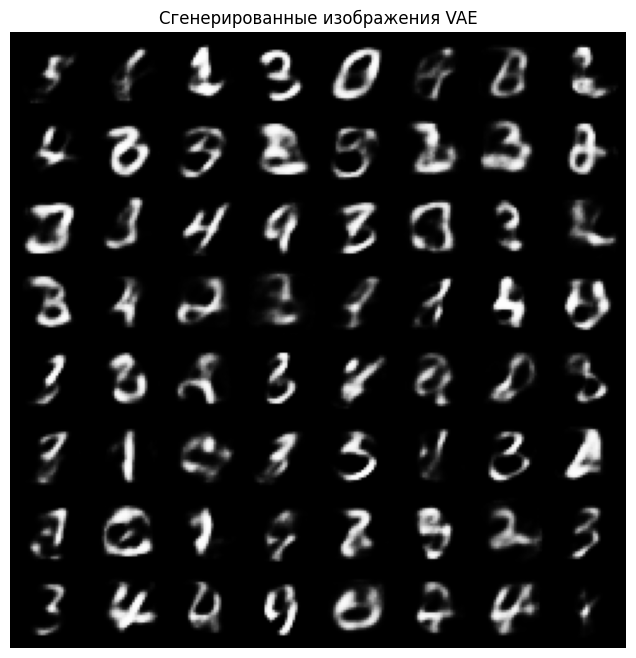

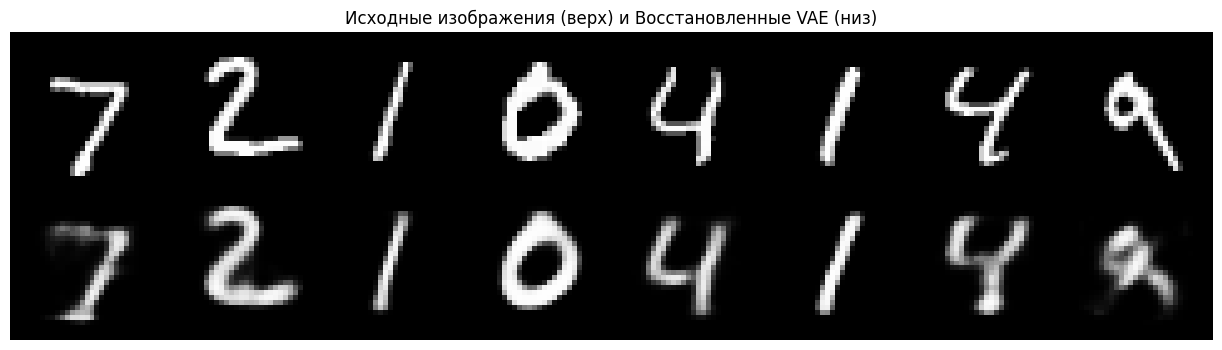

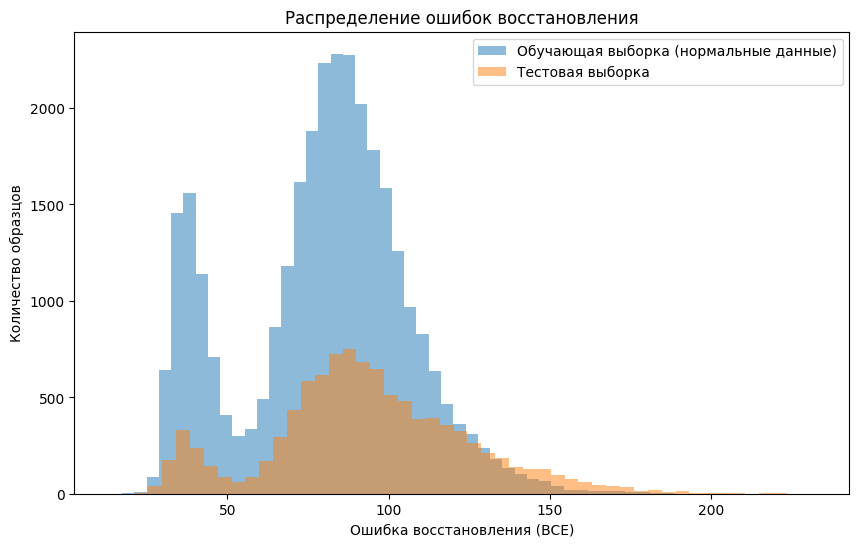

Порог для обнаружения аномалий (95-й процентиль): 120.78286170959473
Количество аномалий в тестовой выборке: 1766


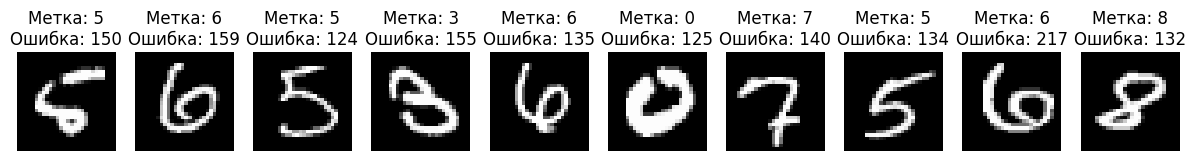

AUC для обнаружения аномалий: 0.7740
Общее время выполнения скрипта: 107.95 секунд


In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np
import torchvision  # Убедитесь, что этот импорт присутствует
from sklearn.metrics import roc_auc_score
import time  # Импортируем модуль time для измерения времени

# Определение устройства (GPU если доступно, иначе CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Используется устройство: {device}")

# Параметры модели
batch_size = 128
latent_dim = 20  # Размер латентного пространства
epochs = 10
learning_rate = 1e-3

# Функция для фильтрации данных
def filter_digits(dataset, digits):
    indices = np.isin(dataset.targets, digits)
    return Subset(dataset, np.where(indices)[0])

# Загрузка набора данных MNIST
transform = transforms.ToTensor()

# Обучающая выборка: цифры 0-4
train_dataset_full = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_dataset = filter_digits(train_dataset_full, digits=[0,1,2,3,4])

# Тестовая выборка: все цифры
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Определение архитектуры VAE
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        # Энкодер
        self.fc1 = nn.Linear(28*28, 400)
        self.fc_mu = nn.Linear(400, latent_dim)      # Среднее
        self.fc_logvar = nn.Linear(400, latent_dim)  # Логарифм дисперсии

        # Декодер
        self.fc3 = nn.Linear(latent_dim, 400)
        self.fc4 = nn.Linear(400, 28*28)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        mu = self.fc_mu(h1)
        logvar = self.fc_logvar(h1)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)  # Стандартное отклонение
        eps = torch.randn_like(std)  # Случайная нормальная шумовая переменная
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 28*28))
        z = self.reparameterize(mu, logvar)
        recon_x = self.decode(z)
        return recon_x, mu, logvar

# Функция потерь для VAE
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 28*28), reduction='sum')

    # Kullback-Leibler дивергенция
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD

# Инициализация модели и оптимизатора
model = VAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Функция обучения
def train(epoch):
    model.train()
    train_loss = 0
    epoch_start_time = time.time()  # Начало измерения времени эпохи
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f"Эпоха {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} "
                  f"({100. * batch_idx / len(train_loader):.0f}%)]\tПотеря: {loss.item() / len(data):.4f}")

    epoch_end_time = time.time()  # Конец измерения времени эпохи
    epoch_duration = epoch_end_time - epoch_start_time
    print(f"====> Эпоха {epoch} Средняя потеря: {train_loss / len(train_loader.dataset):.4f} "
          f"Время: {epoch_duration:.2f} секунд")

# Функция тестирования
def test(epoch):
    model.eval()
    test_loss = 0
    test_start_time = time.time()  # Начало измерения времени тестирования
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.to(device)
            recon, mu, logvar = model(data)
            test_loss += loss_function(recon, data, mu, logvar).item()

    test_end_time = time.time()  # Конец измерения времени тестирования
    test_duration = test_end_time - test_start_time
    test_loss /= len(test_loader.dataset)
    print(f"====> Тестовая потеря: {test_loss:.4f} Время: {test_duration:.2f} секунд")

# Зафиксируем время начала всего скрипта
script_start_time = time.time()

# Обучение модели
for epoch in range(1, epochs + 1):
    train(epoch)
    test(epoch)

# Генерация новых изображений
with torch.no_grad():
    z = torch.randn(64, latent_dim).to(device)
    sample = model.decode(z).cpu()

    # Визуализация сгенерированных изображений
    grid_img = torchvision.utils.make_grid(sample.view(64, 1, 28, 28), nrow=8)
    plt.figure(figsize=(8,8))
    plt.imshow(grid_img.permute(1, 2, 0).squeeze(), cmap='gray')
    plt.title("Сгенерированные изображения VAE")
    plt.axis('off')
    plt.show()

# Восстановление изображений из тестового набора
def visualize_reconstructions():
    model.eval()
    with torch.no_grad():
        data, _ = next(iter(test_loader))
        data = data.to(device)
        recon, _, _ = model(data)

        # Выбираем первые 8 изображений
        n = 8
        comparison = torch.cat([data[:n],
                                recon.view(batch_size, 1, 28, 28)[:n]])
        grid_img = torchvision.utils.make_grid(comparison, nrow=n)

        plt.figure(figsize=(16,4))
        plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy(), cmap='gray')
        plt.title("Исходные изображения (верх) и Восстановленные VAE (низ)")
        plt.axis('off')
        plt.show()

visualize_reconstructions()

# Функция для вычисления ошибок восстановления
def compute_reconstruction_loss(loader):
    model.eval()
    losses = []
    labels = []
    with torch.no_grad():
        for data, target in loader:
            data = data.to(device)
            recon, mu, logvar = model(data)
            # Используем BCE без редукции для получения потерь на уровне каждого элемента
            loss = F.binary_cross_entropy(recon, data.view(-1, 28*28), reduction='none')
            # Суммируем потери по признакам для каждого образца
            loss = loss.sum(dim=1)
            losses.append(loss.cpu().numpy())
            labels.append(target.numpy())
    # Объединяем массивы потерь и меток
    losses = np.concatenate(losses)
    labels = np.concatenate(labels)
    return losses, labels

# Вычисление ошибок восстановления для обучающей и тестовой выборок
train_losses, _ = compute_reconstruction_loss(train_loader)
test_losses, test_labels = compute_reconstruction_loss(test_loader)

# Визуализация распределения ошибок восстановления
plt.figure(figsize=(10,6))
plt.hist(train_losses, bins=50, alpha=0.5, label='Обучающая выборка (нормальные данные)')
plt.hist(test_losses, bins=50, alpha=0.5, label='Тестовая выборка')
plt.legend(loc='upper right')
plt.title("Распределение ошибок восстановления")
plt.xlabel("Ошибка восстановления (BCE)")
plt.ylabel("Количество образцов")
plt.show()

# Установка порога для обнаружения аномалий
# Например, установим порог как 95-й процентиль ошибок восстановления обучающей выборки
threshold = np.percentile(train_losses, 95)
print(f"Порог для обнаружения аномалий (95-й процентиль): {threshold}")

# Обнаружение аномалий в тестовой выборке
anomaly_indices = np.where(test_losses > threshold)[0]
print(f"Количество аномалий в тестовой выборке: {len(anomaly_indices)}")

# Отображение некоторых аномалий
def show_anomalies(indices, labels, num=10):
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices[:num]):
        img = test_loader.dataset[idx][0].squeeze().numpy()
        label = labels[idx]
        plt.subplot(1, num, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Метка: {label}\nОшибка: {test_losses[idx]:.0f}")
        plt.axis('off')
    plt.show()

# Вывод первых 10 аномалий
show_anomalies(anomaly_indices, test_labels, num=10)

# Дополнительно: Метрики оценки
# Создание меток для аномалий
# Нормальные: 0 (цифры 0-4)
# Аномалии: 1 (цифры 5-9)
true_labels = (test_labels >=5).astype(int)
# Предсказанные баллы: ошибки восстановления
pred_scores = test_losses

# Вычисление AUC
auc = roc_auc_score(true_labels, pred_scores)
print(f"AUC для обнаружения аномалий: {auc:.4f}")

# Зафиксируем время окончания всего скрипта
script_end_time = time.time()
script_duration = script_end_time - script_start_time
print(f"Общее время выполнения скрипта: {script_duration:.2f} секунд")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
